### Problem Statement: Boom Bikes demand prediction
Build a multiple linear regression model for the prediction of demand for shared bikes. Boom Bikes want to understand which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('Bike Sharing Dataset_Assignment.csv')

In [3]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [10]:
# checking the null values, datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
### first column 'instant' is an index number, which we do not use in our model building process so we drop it

bike = bike.drop('instant',axis = 1)

In [12]:
# Casual and registered variables are counts of casual and registered users which are already 
# captured in target variable(cnt), both these columns are reduntant, so we drop them.

bike = bike.drop(columns = ['casual','registered'],axis = 1)

In [13]:
# drop the date column as we cannot interpret it for our analysis, 
#converting the date to numerical column has no meaning so we drop it in our analysis
bike.drop('dteday',inplace = True,axis = 1)

categorical columns vs target variable - Box plots to study the distribution of data with target variable
----------------------------------------------------------------------------------------------------------


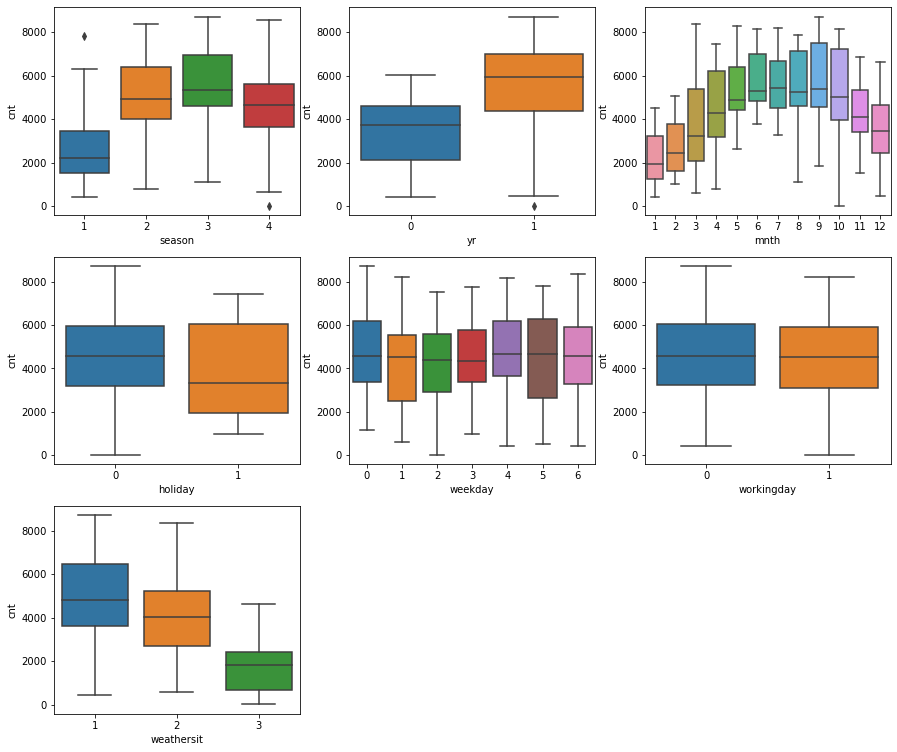

In [14]:
print('categorical columns vs target variable - Box plots to study the distribution of data with target variable')
print('----------------------------------------------------------------------------------------------------------')
plt.figure(figsize = [15,13])
plt.subplot(3,3,1)
sns.boxplot(data = bike, x = 'season', y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data = bike, x = 'yr', y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data = bike, x = 'mnth', y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data = bike, x = 'holiday', y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data = bike, x = 'weekday', y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data = bike, x = 'workingday', y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data = bike, x = 'weathersit', y = 'cnt')
plt.show()

In [15]:
# we convert the categorical columns defined in our dataset as int64 to object type
# since these variables are categorical columns encoded in numbers we convert them from int64 to object datatype

bike.season = bike.season.astype('object')
bike.yr = bike.yr.astype('object')
bike.mnth = bike.mnth.astype('object')
bike.holiday = bike.holiday.astype('object')
bike.weekday = bike.workingday.astype('object')
bike.workingday = bike.workingday.astype('object')
bike.weathersit = bike.weathersit.astype('object')

In [16]:
cat_feat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cat_feat

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [17]:
cat_feat_df = bike[cat_feat]

In [12]:
cat_feat_df

season yr mnth holiday weekday workingday weathersit
0        1  0    1       0       1          1          2
1        1  0    1       0       1          1          2
2        1  0    1       0       1          1          1
3        1  0    1       0       1          1          1
4        1  0    1       0       1          1          1
..     ... ..  ...     ...     ...        ...        ...
725      1  1   12       0       1          1          2
726      1  1   12       0       0          0          2
727      1  1   12       0       0          0          2
728      1  1   12       0       1          1          1
729      1  1   12       0       1          1          2

[730 rows x 7 columns]

In [18]:
# creation of dummy variables for categorical columns
dummy_cat_feat = pd.get_dummies(cat_feat_df,drop_first = True)

In [19]:
dummy_cat_feat.head()

season_2  season_3  season_4  yr_1  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
0         0         0         0     0       0       0       0       0       0   
1         0         0         0     0       0       0       0       0       0   
2         0         0         0     0       0       0       0       0       0   
3         0         0         0     0       0       0       0       0       0   
4         0         0         0     0       0       0       0       0       0   

   mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  holiday_1  weekday_1  \
0       0       0       0        0        0        0          0          1   
1       0       0       0        0        0        0          0          1   
2       0       0       0        0        0        0          0          1   
3       0       0       0        0        0        0          0          1   
4       0       0       0        0        0        0          0          1   

   workingday_1  weathersit_2  weathersit_3  
0             1             1             0  
1             1             1             0  
2             1             0             0  
3             1             0             0  
4             1             0             0

In [20]:
bike = pd.concat([bike , dummy_cat_feat],axis = 1)

In [21]:
bike

season yr mnth holiday weekday workingday weathersit       temp     atemp  \
0        1  0    1       0       1          1          2  14.110847  18.18125   
1        1  0    1       0       1          1          2  14.902598  17.68695   
2        1  0    1       0       1          1          1   8.050924   9.47025   
3        1  0    1       0       1          1          1   8.200000  10.60610   
4        1  0    1       0       1          1          1   9.305237  11.46350   
..     ... ..  ...     ...     ...        ...        ...        ...       ...   
725      1  1   12       0       1          1          2  10.420847  11.33210   
726      1  1   12       0       0          0          2  10.386653  12.75230   
727      1  1   12       0       0          0          2  10.386653  12.12000   
728      1  1   12       0       1          1          1  10.489153  11.58500   
729      1  1   12       0       1          1          2   8.849153  11.17435   

         hum  ...  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  holiday_1  \
0    80.5833  ...       0       0        0        0        0          0   
1    69.6087  ...       0       0        0        0        0          0   
2    43.7273  ...       0       0        0        0        0          0   
3    59.0435  ...       0       0        0        0        0          0   
4    43.6957  ...       0       0        0        0        0          0   
..       ...  ...     ...     ...      ...      ...      ...        ...   
725  65.2917  ...       0       0        0        0        1          0   
726  59.0000  ...       0       0        0        0        1          0   
727  75.2917  ...       0       0        0        0        1          0   
728  48.3333  ...       0       0        0        0        1          0   
729  57.7500  ...       0       0        0        0        1          0   

     weekday_1  workingday_1  weathersit_2  weathersit_3  
0            1             1             1             0  
1            1             1             1             0  
2            1             1             0             0  
3            1             1             0             0  
4            1             1             0             0  
..         ...           ...           ...           ...  
725          1             1             1             0  
726          0             0             1             0  
727          0             0             1             0  
728          1             1             0             0  
729          1             1             1             0  

[730 rows x 32 columns]

In [22]:
# we drop the categorical features as we already created the dummy categorical features
bike.drop(columns = cat_feat,inplace = True)

In [23]:
bike.head()

temp     atemp      hum  windspeed   cnt  season_2  season_3  \
0  14.110847  18.18125  80.5833  10.749882   985         0         0   
1  14.902598  17.68695  69.6087  16.652113   801         0         0   
2   8.050924   9.47025  43.7273  16.636703  1349         0         0   
3   8.200000  10.60610  59.0435  10.739832  1562         0         0   
4   9.305237  11.46350  43.6957  12.522300  1600         0         0   

   season_4  yr_1  mnth_2  ...  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  \
0         0     0       0  ...       0       0        0        0        0   
1         0     0       0  ...       0       0        0        0        0   
2         0     0       0  ...       0       0        0        0        0   
3         0     0       0  ...       0       0        0        0        0   
4         0     0       0  ...       0       0        0        0        0   

   holiday_1  weekday_1  workingday_1  weathersit_2  weathersit_3  
0          0          1             1             1             0  
1          0          1             1             1             0  
2          0          1             1             0             0  
3          0          1             1             0             0  
4          0          1             1             0             0  

[5 rows x 25 columns]

In [24]:
# In the bike share dataset, numerical columns we have are :
num_vars = ['temp','atemp','hum','windspeed','cnt']

### Bivariate Analysis - Numerical Columns

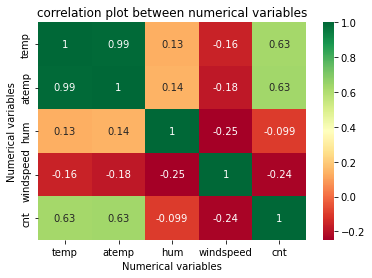

In [25]:
# heatmap to find the highest correlation between numerical variables

sns.heatmap(bike[num_vars].corr(),annot = True, cmap = 'RdYlGn')

plt.title('correlation plot between numerical variables')
plt.xlabel('Numerical variables')
plt.ylabel('Numerical variables')
plt.show()

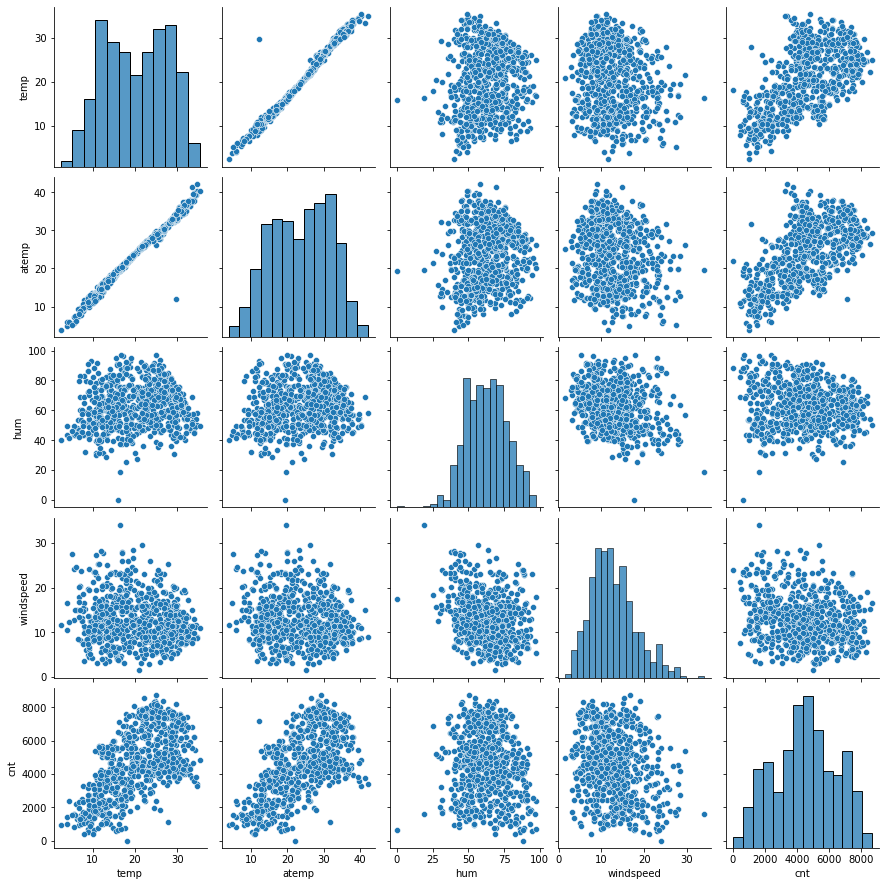

In [26]:
# pairplot between numerical variables
sns.pairplot(bike[num_vars])
plt.show()

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [57]:
df_train,df_test = train_test_split(bike,train_size = 0.7 , random_state = 100)

In [58]:
df_train.shape

(510, 25)

In [59]:
df_test.shape

(220, 25)

### Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [63]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [64]:
# we will apply scaler to numerical columns of the training set and not on dummy variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [65]:
y_train = df_train.pop('cnt')

In [66]:
X_train = df_train

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)


In [68]:
# we check whether a feature is selected we use rfe.support_ is True or False.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 5),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('holiday_1', True, 1),
 ('weekday_1', False, 6),
 ('workingday_1', False, 10),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [69]:
col = list(X_train.columns[rfe.support_])
col

['temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'yr_1',
 'mnth_3',
 'mnth_5',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'holiday_1',
 'weathersit_2',
 'weathersit_3']

### Choosing the features by using RFE from sklearn we arrived at Top 15 features

In [70]:
X_train_rfe = X_train[col]
X_train_rfe.head()

temp       hum  windspeed  season_2  season_3  season_4  yr_1  \
576  0.815169  0.725633   0.264686         0         1         0     1   
426  0.442393  0.640189   0.255342         0         0         0     1   
728  0.245101  0.498067   0.663106         0         0         0     1   
482  0.395666  0.504508   0.188475         1         0         0     1   
111  0.345824  0.751824   0.380981         1         0         0     0   

     mnth_3  mnth_5  mnth_8  mnth_9  mnth_10  holiday_1  weathersit_2  \
576       0       0       0       0        0          0             0   
426       1       0       0       0        0          0             1   
728       0       0       0       0        0          0             0   
482       0       0       0       0        0          0             1   
111       0       0       0       0        0          0             1   

     weathersit_3  
576             0  
426             0  
728             0  
482             0  
111             0

In [71]:
# Now we use statsmodel for our model building, detailed statistics and furthur fine tuning of feature selection 

# 1st Model 

import statsmodels.api as sm

# Add constant 
X_train_const = sm.add_constant(X_train_rfe)
# Build Model
lr = sm.OLS(y_train,X_train_const)
#Fit model 
lr_model1 = lr.fit()

# stats summary 
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.00e-188
Time:                        10:14:53   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665      0.000       0.184       0.291
temp             0.4869      0.034     14.119      0.000       0.419       0.555
hum             -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed       -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2         0.1166      0.015      7.527      0.000       0.086       0.147
season_3         0.0425      0.023      1.847      0.065      -0.003       0.088
season_4         0.1530      0.014     10.801      0.000       0.125       0.181
yr_1             0.2304      0.008     28.453      0.000       0.215       0.246
mnth_3           0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5           0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8           0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9           0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10          0.0407      0.018      2.314      0.021       0.006       0.075
holiday_1       -0.0889      0.025     -3.487      0.001      -0.139      -0.039
weathersit_2    -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_3    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = pd.DataFrame()

vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

features        vif
0           temp  24.628447
1            hum  15.533557
4       season_3   8.797455
2      windspeed   3.805130
3       season_2   3.752948
5       season_4   3.108748
13  weathersit_2   2.150741
6           yr_1   2.045185
9         mnth_8   1.850460
8         mnth_5   1.675521
11       mnth_10   1.628284
10        mnth_9   1.507524
7         mnth_3   1.323536
14  weathersit_3   1.194986
12     holiday_1   1.047414

In [74]:
# we drop mnth_5 as the p value = 0.115(>0.05) 
X_train_rfe.drop('mnth_5',inplace = True , axis = 1)

In [75]:
# We build 2nd model 
X_train_const = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_const)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.46e-189
Time:                        10:15:12   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.525      0.000       0.179       0.286
temp             0.4965      0.034     14.604      0.000       0.430       0.563
hum             -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed       -0.1858      0.026     -7.234      0.000      -0.236      -0.135
season_2         0.1225      0.015      8.137      0.000       0.093       0.152
season_3         0.0361      0.023      1.593      0.112      -0.008       0.081
season_4         0.1502      0.014     10.671      0.000       0.123       0.178
yr_1             0.2298      0.008     28.366      0.000       0.214       0.246
mnth_3           0.0279      0.014      1.931      0.054      -0.000       0.056
mnth_8           0.0505      0.018      2.883      0.004       0.016       0.085
mnth_9           0.1202      0.017      6.946      0.000       0.086       0.154
mnth_10          0.0393      0.018      2.231      0.026       0.005       0.074
holiday_1       -0.0900      0.026     -3.528      0.000      -0.140      -0.040
weathersit_2    -0.0544      0.010     -5.199      0.000      -0.075      -0.034
weathersit_3    -0.2449      0.026     -9.259      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()

vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

features        vif
0           temp  24.019036
1            hum  15.482591
4       season_3   8.528598
2      windspeed   3.733582
3       season_2   3.534563
5       season_4   3.048664
12  weathersit_2   2.149236
6           yr_1   2.033827
8         mnth_8   1.850326
10       mnth_10   1.625970
9         mnth_9   1.507451
7         mnth_3   1.268326
13  weathersit_3   1.194699
11     holiday_1   1.046258

In [77]:
# we drop season_3 column as its p-value is 0.112 (>0.05)
X_train_rfe.drop(columns = ['season_3'],inplace = True, axis = 1)

In [78]:
# We build 3rd model 

import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_const)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          5.94e-190
Time:                        10:15:28   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2326      0.027      8.525      0.000       0.179       0.286
temp             0.5371      0.023     23.855      0.000       0.493       0.581
hum             -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed       -0.1893      0.026     -7.388      0.000      -0.240      -0.139
season_2         0.1059      0.011      9.743      0.000       0.085       0.127
season_4         0.1393      0.012     11.304      0.000       0.115       0.163
yr_1             0.2287      0.008     28.289      0.000       0.213       0.245
mnth_3           0.0233      0.014      1.642      0.101      -0.005       0.051
mnth_8           0.0605      0.016      3.699      0.000       0.028       0.093
mnth_9           0.1292      0.016      7.897      0.000       0.097       0.161
mnth_10          0.0355      0.017      2.032      0.043       0.001       0.070
holiday_1       -0.0917      0.026     -3.591      0.000      -0.142      -0.042
weathersit_2    -0.0532      0.010     -5.093      0.000      -0.074      -0.033
weathersit_3    -0.2401      0.026     -9.123      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()

vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

features        vif
1            hum  14.725177
0           temp  10.014790
2      windspeed   3.696873
4       season_4   2.323921
11  weathersit_2   2.138578
5           yr_1   2.019453
3       season_2   1.835183
7         mnth_8   1.610343
9        mnth_10   1.595567
8         mnth_9   1.343906
6         mnth_3   1.216355
12  weathersit_3   1.178255
10     holiday_1   1.044523

In [80]:
# we drop mnth_3 column as its p-value 0.101(>0.05)
X_train_rfe.drop(columns = ['mnth_3'],inplace = True, axis = 1)

In [81]:
# We build 4th model 

import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_const)
lr_model4 = lr.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.49e-190
Time:                        10:15:41   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.838      0.000       0.186       0.292
temp             0.5316      0.022     23.836      0.000       0.488       0.575
hum             -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed       -0.1868      0.026     -7.291      0.000      -0.237      -0.136
season_2         0.1058      0.011      9.719      0.000       0.084       0.127
season_4         0.1353      0.012     11.180      0.000       0.112       0.159
yr_1             0.2289      0.008     28.264      0.000       0.213       0.245
mnth_8           0.0585      0.016      3.583      0.000       0.026       0.091
mnth_9           0.1277      0.016      7.803      0.000       0.096       0.160
mnth_10          0.0358      0.018      2.046      0.041       0.001       0.070
holiday_1       -0.0941      0.026     -3.685      0.000      -0.144      -0.044
weathersit_2    -0.0531      0.010     -5.073      0.000      -0.074      -0.033
weathersit_3    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()

vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

features        vif
1            hum  14.379825
0           temp   9.881889
2      windspeed   3.587183
4       season_4   2.247185
10  weathersit_2   2.134961
5           yr_1   2.016237
3       season_2   1.835062
6         mnth_8   1.599238
8        mnth_10   1.595486
7         mnth_9   1.337041
11  weathersit_3   1.178237
9      holiday_1   1.041726

In [83]:
# after building the 4th model all the features came out to be significant (p-value < 0.05)
# we check for vif between the selected features for feature selection process

In [84]:
# we drop hum column as its vif 14.37 (>5) is very high
X_train_rfe.drop(columns = ['hum'],inplace = True, axis = 1)

In [85]:
# We build 5th model 

import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_const)
lr_model5 = lr.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          9.45e-187
Time:                        10:16:14   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1346      0.017      8.014      0.000       0.102       0.168
temp             0.5099      0.022     22.823      0.000       0.466       0.554
windspeed       -0.1517      0.025     -6.035      0.000      -0.201      -0.102
season_2         0.1026      0.011      9.237      0.000       0.081       0.124
season_4         0.1266      0.012     10.345      0.000       0.103       0.151
yr_1             0.2329      0.008     28.281      0.000       0.217       0.249
mnth_8           0.0569      0.017      3.406      0.001       0.024       0.090
mnth_9           0.1208      0.017      7.245      0.000       0.088       0.154
mnth_10          0.0311      0.018      1.741      0.082      -0.004       0.066
holiday_1       -0.0956      0.026     -3.660      0.000      -0.147      -0.044
weathersit_2    -0.0820      0.009     -9.299      0.000      -0.099      -0.065
weathersit_3    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()

vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

features       vif
0           temp  5.112969
1      windspeed  3.109936
4           yr_1  2.004836
3       season_4  1.929711
2       season_2  1.827172
5         mnth_8  1.592074
7        mnth_10  1.587241
9   weathersit_2  1.491571
6         mnth_9  1.336839
10  weathersit_3  1.095553
8      holiday_1  1.037209

In [87]:
# we drop mnth_10 column as its p-value is 0.08 (>0.05) is very high
X_train_rfe.drop(columns = ['mnth_10'],inplace = True, axis = 1)

In [88]:
# We build 6th model 

import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_const)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.62e-187
Time:                        10:18:19   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837      0.000       0.098       0.163
temp             0.5173      0.022     23.546      0.000       0.474       0.561
windspeed       -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2         0.1012      0.011      9.116      0.000       0.079       0.123
season_4         0.1371      0.011     12.843      0.000       0.116       0.158
yr_1             0.2326      0.008     28.191      0.000       0.216       0.249
mnth_8           0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9           0.1163      0.017      7.046      0.000       0.084       0.149
holiday_1       -0.0966      0.026     -3.692      0.000      -0.148      -0.045
weathersit_2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = pd.DataFrame()

vif['features'] = X_train_rfe.columns
vif['vif'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(0,X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

features       vif
0          temp  5.012840
1     windspeed  3.103226
4          yr_1  2.000292
2      season_2  1.815872
5        mnth_8  1.581198
8  weathersit_2  1.491031
3      season_4  1.483394
6        mnth_9  1.307124
9  weathersit_3  1.081314
7     holiday_1  1.036152

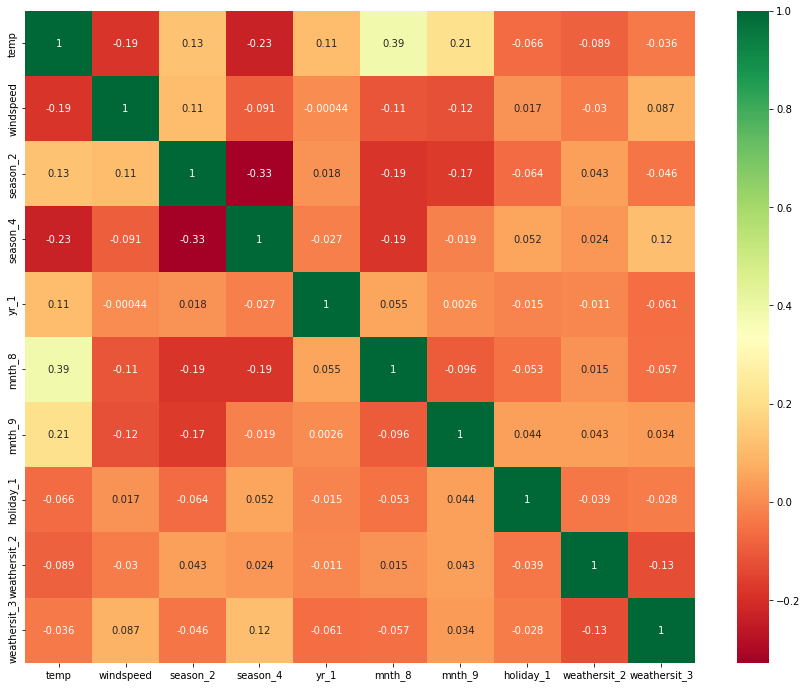

In [90]:
plt.figure(figsize = [15,12])
sns.heatmap(X_train_rfe.corr(),cmap = 'RdYlGn',annot = True)
plt.show()

In [91]:
X_train_rfe

temp  windspeed  season_2  season_4  yr_1  mnth_8  mnth_9  holiday_1  \
576  0.815169   0.264686         0         0     1       0       0          0   
426  0.442393   0.255342         0         0     1       0       0          0   
728  0.245101   0.663106         0         0     1       0       0          0   
482  0.395666   0.188475         1         0     1       0       0          0   
111  0.345824   0.380981         1         0     0       0       0          0   
..        ...        ...       ...       ...   ...     ...     ...        ...   
578  0.863973   0.187140         0         0     1       1       0          0   
53   0.202618   0.111379         0         0     0       0       0          0   
350  0.248216   0.431816         0         1     0       0       0          0   
79   0.462664   0.529881         1         0     0       0       0          0   
520  0.600225   0.359599         1         0     1       0       0          0   

     weathersit_2  weathersit_3  
576             0             0  
426             1             0  
728             0             0  
482             1             0  
111             1             0  
..            ...           ...  
578             0             0  
53              0             0  
350             1             0  
79              1             0  
520             1             0  

[510 rows x 10 columns]

In [92]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [93]:
X_train_const

const      temp  windspeed  season_2  season_4  yr_1  mnth_8  mnth_9  \
576    1.0  0.815169   0.264686         0         0     1       0       0   
426    1.0  0.442393   0.255342         0         0     1       0       0   
728    1.0  0.245101   0.663106         0         0     1       0       0   
482    1.0  0.395666   0.188475         1         0     1       0       0   
111    1.0  0.345824   0.380981         1         0     0       0       0   
..     ...       ...        ...       ...       ...   ...     ...     ...   
578    1.0  0.863973   0.187140         0         0     1       1       0   
53     1.0  0.202618   0.111379         0         0     0       0       0   
350    1.0  0.248216   0.431816         0         1     0       0       0   
79     1.0  0.462664   0.529881         1         0     0       0       0   
520    1.0  0.600225   0.359599         1         0     1       0       0   

     holiday_1  weathersit_2  weathersit_3  
576          0             0             0  
426          0             1             0  
728          0             0             0  
482          0             1             0  
111          0             1             0  
..         ...           ...           ...  
578          0             0             0  
53           0             0             0  
350          0             1             0  
79           0             1             0  
520          0             1             0  

[510 rows x 11 columns]

In [94]:
# predict the y_train of the trained model and name it as y_train_pred

y_train_pred = lr_model6.predict(X_train_const)
y_train_pred

576    0.745375
426    0.472785
728    0.390812
482    0.559839
111    0.272671
         ...   
578    0.836373
53     0.218870
350    0.250438
79     0.310824
520    0.640045
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

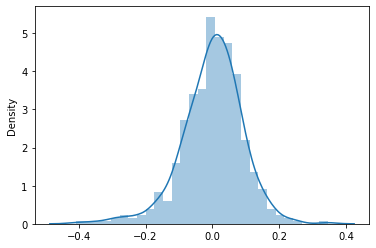

In [125]:
# now you have predicted values we do the residual analysis by plotting the histogram of error terms. 

resid = y_train - y_train_pred
sns.distplot(resid)

### Distribution of error terms - satisfying the normality assumption of linear regression
        ---Here Error terms are centered around Zero
        ---Distribution is normal

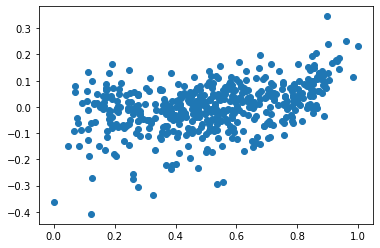

In [126]:
## checking for homoscedascity assumption for linear regression : constant error along the target variable

plt.scatter(y_train,resid)
plt.show()

In [97]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y_true = y_train,y_pred= y_train_pred)

0.8338606244120907

### Trained model is able to explain the 83.38% of the variance observed in target variable

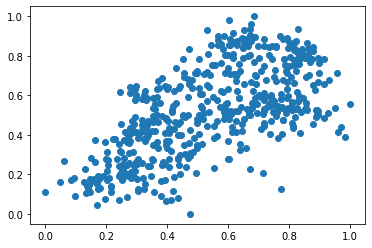

In [138]:
# checking for linear relationship between temp and target variable
plt.scatter(X_train_const['temp'],y_train)
plt.show()

In [132]:
resid

576    0.082282
426   -0.007529
728   -0.186716
482   -0.076866
111   -0.081575
         ...   
578   -0.003539
53    -0.000853
350    0.062149
79    -0.074400
520    0.162877
Length: 510, dtype: float64

## normality check for residuals using Q - Q plot

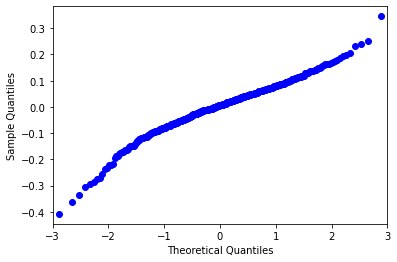

In [133]:
## Q-Q plot 

sm.qqplot(resid)
plt.show()

### the residuals from bottom left to top right indicates all points are on straight line and linear 

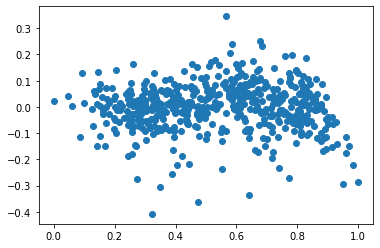

In [142]:
## correlation between temp and residual
plt.scatter(X_train_const['temp'], resid)
plt.show()

### from the above plot we see there is no correlation between temp and resid term

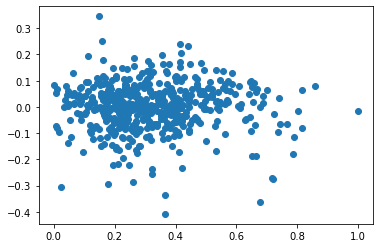

In [144]:
## correlation betwwen windspeed and resid
plt.scatter(X_train_const['windspeed'], resid)
plt.show()

### from the above plot we see there is no correlation between windspeed and resid term

## Model Evaluation

In [99]:
## Now the last step to predict on the testset & finally evaluate
## Here we need to scale the training set as well because the train set has learned the coefficients on the scaled values
##(between 0 and 1---as we used min max scaler). so we need to scale the test values as well
df_test.head()

temp     atemp      hum  windspeed   cnt  season_2  season_3  \
184  29.793347  33.27085  63.7917   5.459106  6043         0         1   
535  32.082500  36.04875  59.2083   7.625404  6211         1         0   
299  19.270000  22.85230  81.2917  13.250121  2659         0         0   
221  31.433347  34.24915  42.4167  13.417286  4780         0         1   
152  29.315000  32.19710  30.5000  19.583229  4968         1         0   

     season_4  yr_1  mnth_2  ...  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  \
184         0     0       0  ...       0       0        0        0        0   
535         0     1       0  ...       0       0        0        0        0   
299         1     0       0  ...       0       0        1        0        0   
221         0     0       0  ...       1       0        0        0        0   
152         0     0       0  ...       0       0        0        0        0   

     holiday_1  weekday_1  workingday_1  weathersit_2  weathersit_3  
184          1          0             0             1             0  
535          0          1             1             0             0  
299          0          0             0             1             0  
221          0          1             1             0             0  
152          0          0             0             0             0  

[5 rows x 25 columns]

In [100]:
# we use the same numerical variables for scaling
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [101]:
# we do only tranform on the numerical variables as we do not use fit_transform test here because we are trying 
# to predict the values based on the train data and use the model 
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

temp     atemp       hum  windspeed       cnt
184  0.831783  0.769660  0.657364   0.084219  0.692706
535  0.901354  0.842587  0.610133   0.153728  0.712034
299  0.511964  0.496145  0.837699   0.334206  0.303382
221  0.881625  0.795343  0.437098   0.339570  0.547400
152  0.817246  0.741471  0.314298   0.537414  0.569029

In [102]:
df_test.head()

temp     atemp       hum  windspeed       cnt  season_2  season_3  \
184  0.831783  0.769660  0.657364   0.084219  0.692706         0         1   
535  0.901354  0.842587  0.610133   0.153728  0.712034         1         0   
299  0.511964  0.496145  0.837699   0.334206  0.303382         0         0   
221  0.881625  0.795343  0.437098   0.339570  0.547400         0         1   
152  0.817246  0.741471  0.314298   0.537414  0.569029         1         0   

     season_4  yr_1  mnth_2  ...  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  \
184         0     0       0  ...       0       0        0        0        0   
535         0     1       0  ...       0       0        0        0        0   
299         1     0       0  ...       0       0        1        0        0   
221         0     0       0  ...       1       0        0        0        0   
152         0     0       0  ...       0       0        0        0        0   

     holiday_1  weekday_1  workingday_1  weathersit_2  weathersit_3  
184          1          0             0             1             0  
535          0          1             1             0             0  
299          0          0             0             1             0  
221          0          1             1             0             0  
152          0          0             0             0             0  

[5 rows x 25 columns]

In [103]:
y_test = df_test.pop('cnt')

In [104]:
X_test = df_test

In [105]:
X_test

temp     atemp       hum  windspeed  season_2  season_3  season_4  \
184  0.831783  0.769660  0.657364   0.084219         0         1         0   
535  0.901354  0.842587  0.610133   0.153728         1         0         0   
299  0.511964  0.496145  0.837699   0.334206         0         0         1   
221  0.881625  0.795343  0.437098   0.339570         0         1         0   
152  0.817246  0.741471  0.314298   0.537414         1         0         0   
..        ...       ...       ...        ...       ...       ...       ...   
702  0.519232  0.511907  0.756118   0.283397         0         0         1   
127  0.584649  0.577380  0.650923   0.069510         1         0         0   
640  0.745598  0.682653  0.817947   0.052115         0         0         1   
72   0.331557  0.332005  0.512107   0.203418         0         0         0   
653  0.509887  0.501133  0.575354   0.300794         0         0         1   

     yr_1  mnth_2  mnth_3  ...  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  \
184     0       0       0  ...       0       0        0        0        0   
535     1       0       0  ...       0       0        0        0        0   
299     0       0       0  ...       0       0        1        0        0   
221     0       0       0  ...       1       0        0        0        0   
152     0       0       0  ...       0       0        0        0        0   
..    ...     ...     ...  ...     ...     ...      ...      ...      ...   
702     1       0       0  ...       0       0        0        0        1   
127     0       0       0  ...       0       0        0        0        0   
640     1       0       0  ...       0       0        1        0        0   
72      0       0       1  ...       0       0        0        0        0   
653     1       0       0  ...       0       0        1        0        0   

     holiday_1  weekday_1  workingday_1  weathersit_2  weathersit_3  
184          1          0             0             1             0  
535          0          1             1             0             0  
299          0          0             0             1             0  
221          0          1             1             0             0  
152          0          0             0             0             0  
..         ...        ...           ...           ...           ...  
702          0          1             1             0             0  
127          0          1             1             0             0  
640          0          1             1             1             0  
72           0          1             1             0             0  
653          0          1             1             0             0  

[220 rows x 24 columns]

In [106]:
final_features = list(X_train_rfe.columns)

In [107]:
final_features

['temp',
 'windspeed',
 'season_2',
 'season_4',
 'yr_1',
 'mnth_8',
 'mnth_9',
 'holiday_1',
 'weathersit_2',
 'weathersit_3']

In [108]:
X_test_rfe = X_test[final_features]

In [109]:
X_test_rfe

temp  windspeed  season_2  season_4  yr_1  mnth_8  mnth_9  holiday_1  \
184  0.831783   0.084219         0         0     0       0       0          1   
535  0.901354   0.153728         1         0     1       0       0          0   
299  0.511964   0.334206         0         1     0       0       0          0   
221  0.881625   0.339570         0         0     0       1       0          0   
152  0.817246   0.537414         1         0     0       0       0          0   
..        ...        ...       ...       ...   ...     ...     ...        ...   
702  0.519232   0.283397         0         1     1       0       0          0   
127  0.584649   0.069510         1         0     0       0       0          0   
640  0.745598   0.052115         0         1     1       0       0          0   
72   0.331557   0.203418         0         0     0       0       0          0   
653  0.509887   0.300794         0         1     1       0       0          0   

     weathersit_2  weathersit_3  
184             1             0  
535             0             0  
299             1             0  
221             0             0  
152             0             0  
..            ...           ...  
702             0             0  
127             0             0  
640             1             0  
72              0             0  
653             0             0  

[220 rows x 10 columns]

In [110]:
X_test_const = sm.add_constant(X_test_rfe)

In [111]:
y_pred = lr_model6.predict(X_test_const)

In [112]:
y_pred

184    0.370711
535    0.907790
299    0.401497
221    0.590123
152    0.574274
         ...   
702    0.726566
127    0.523993
640    0.797159
72     0.271795
653    0.719127
Length: 220, dtype: float64

In [113]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [114]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7935224695104377

## test data r2_score of 0.79 is very close to r2_score of train data. 
79.3 % of variance in y_test is explained by trained model which indicates a good prediction by the model.

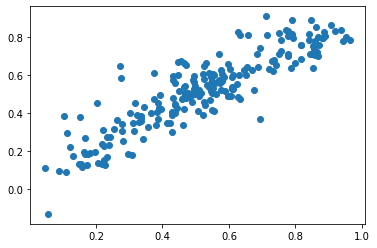

In [119]:
plt.scatter(y_test, y_pred)

### Above scatter plot indicates the linear relationship between y_test and y_pred

### Distribution of error terms

In [120]:
error = y_test-y_pred

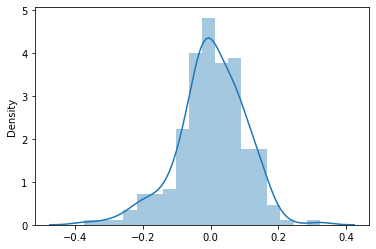

In [140]:
sns.distplot(error)
plt.show()

### Distribution of error terms - satisfying the normality assumption of linear regression
        ---Here Error terms are centered around Zero
        ---Distribution is normal

### Homoscedascity check

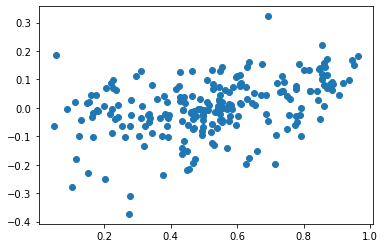

In [141]:
## checking for homoscedascity assumption for linear regression : constant error along the target variable

plt.scatter(y_test,error)
plt.show()

### Normality of error terms check using Q-Q plot

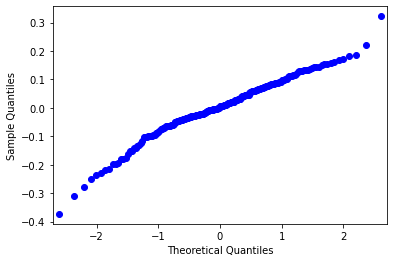

In [134]:
sm.qqplot(error)
plt.show()

### Above Q-Q plot shows all the points lie on a straight line

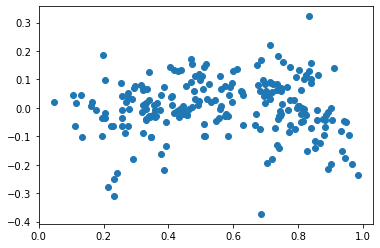

In [155]:
## correlation between temp and residual
plt.scatter(X_test_const['temp'], error)
plt.show()

### from the above plot we see there is no correlation between temp and error term

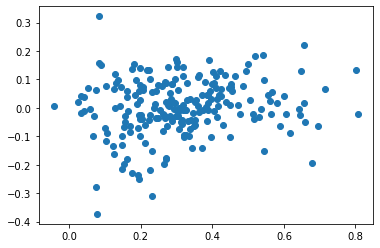

In [156]:
## correlation between temp and residual
plt.scatter(X_test_const['windspeed'], error)
plt.show()

### from the above plot we see there is no correlation between windspeed and resid term

### Summary of Boom bikes Dataset Model building using Linear Regression

After building a Multiple linear regression model.we came to know that below predictor variables are driving the demand for boom bikes and the relationship between the predictor variables and target variable (cnt) is determined as in below equation.

### Interpretation for business stakeholders of Boom bikes

The top 4 driving factors behind the demand for the boom bikes:

1. Significant positive demand for boom bikes on one unit change in temperature in celsius
2. Demand for boom bikes increased from the base year(0 - 2018) to current year(1 - 2019) which is explained by the significance of the coefficient(0.2326) associated with yr_1 this indicates the increase in popularity compared to base year. 
3. Significant negative demand for boom bikes when weathersit is of type : 
   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4. windspeed does effect the demand for boom bikes , when there is a increase of 1 unit of windspeed the demand for boom bikes drops by 0.1497
